In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.preprocessing import RobustScaler,PowerTransformer,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier,BaggingClassifier,RandomForestClassifier
from sklearn.dummy import DummyClassifier
import optuna

In [125]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/smoke-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\deepcontractor\smoke-detection-dataset\versions\1


In [126]:
df = pd.read_csv(r"C:\Users\HP\.cache\kagglehub\datasets\deepcontractor\smoke-detection-dataset\versions\1\smoke_detection_iot.csv")

In [127]:
data = df.copy()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [133]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [135]:
# df = ['Temperature[C]','Humidity[%]','TVOC[ppb]','eCO2[ppm]','Raw H2','Raw Ethanol','Pressure[hPa]','PM1.0',	'PM2.5'	,'NC0.5',	'NC1.0'	,'NC2.5','Fire Alarm']

In [137]:
df =df.drop(columns = ['Unnamed: 0','UTC','CNT','NC0.5'	,'NC1.0'	,'NC2.5'])

In [139]:
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,0


In [141]:
df.drop_duplicates()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,0


In [144]:
df.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
Fire Alarm        0
dtype: int64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   Fire Alarm      62630 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 4.8 MB


In [148]:
df1, _ = train_test_split(df, train_size=15000, stratify=df['Fire Alarm'])

In [150]:
df1.to_csv("fire_alarm_csv.csv")

In [152]:
df1.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm'],
      dtype='object')

In [154]:
df1['Fire Alarm'].value_counts()

Fire Alarm
1    10719
0     4281
Name: count, dtype: int64

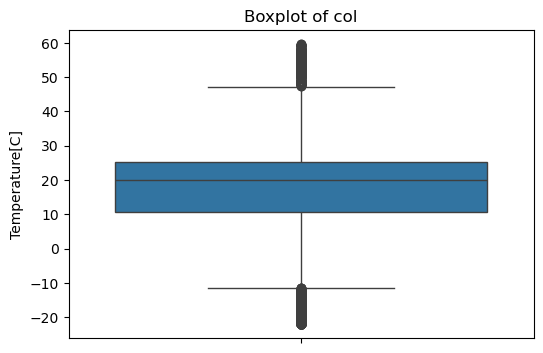

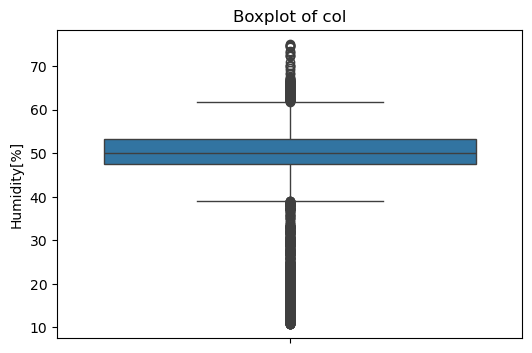

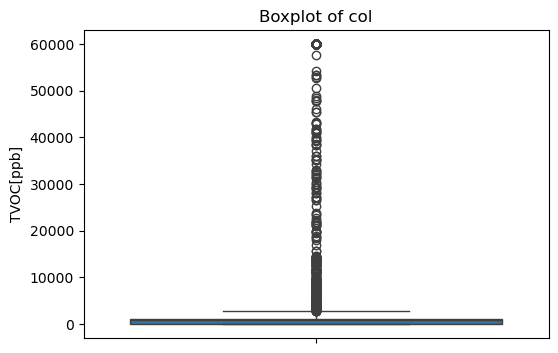

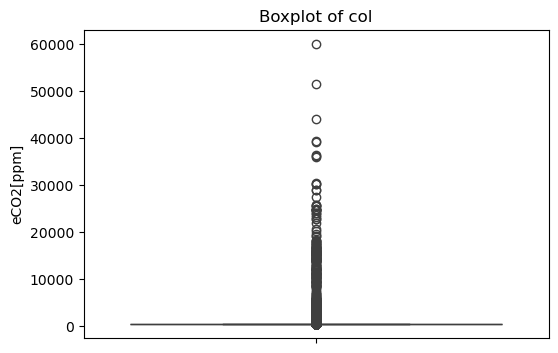

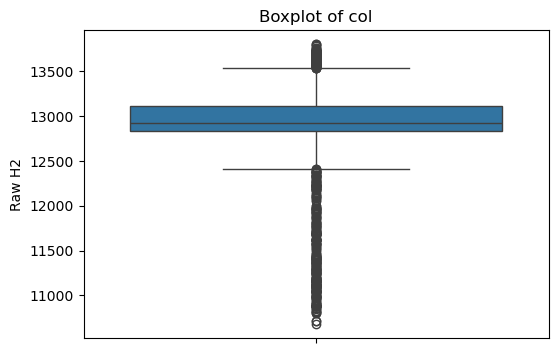

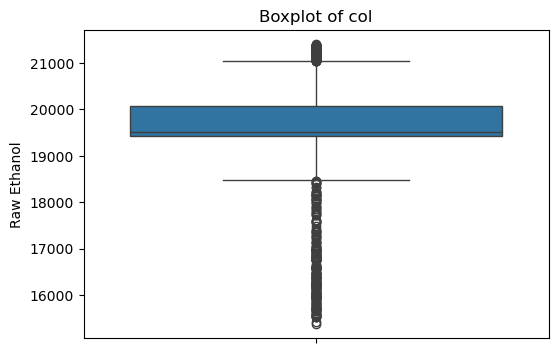

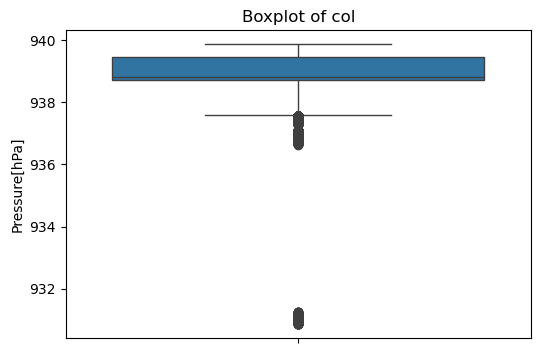

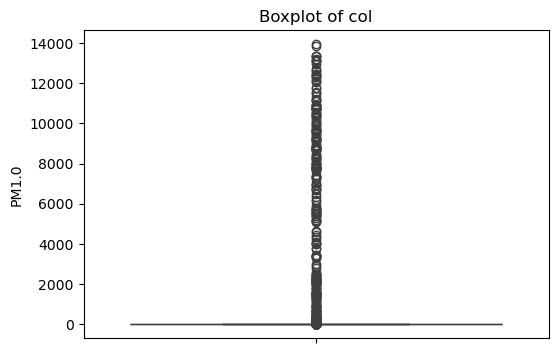

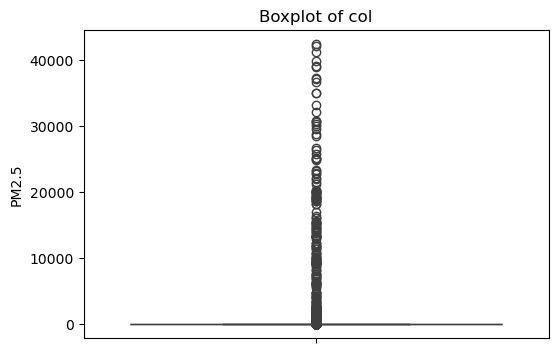

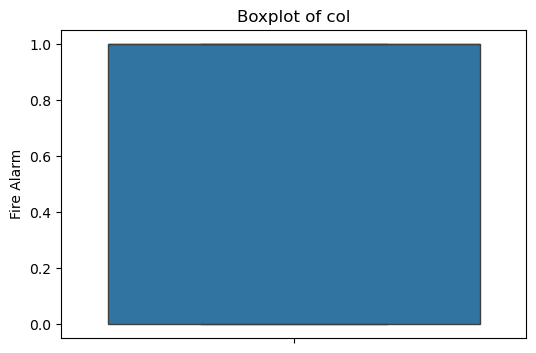

In [156]:
for col in ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm' ]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df1[col])
    plt.title(f'Boxplot of {'col'}')
    plt.show()

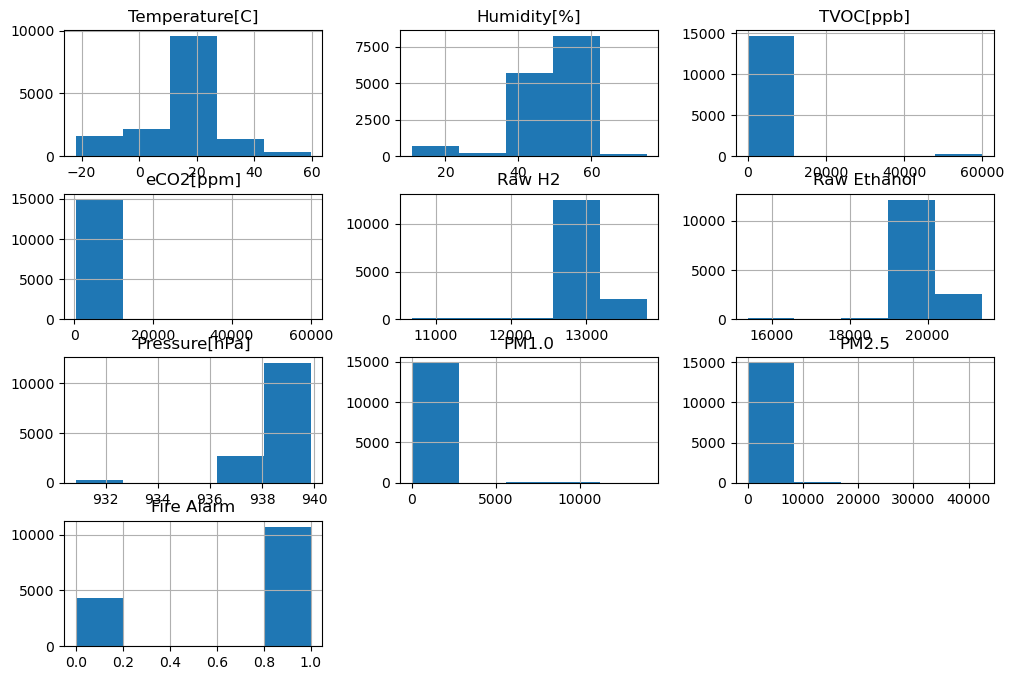

In [157]:
df1.hist(figsize=(12, 8), bins=5)
plt.show()


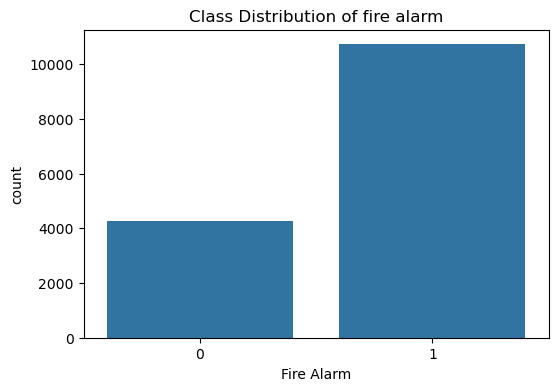

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x=df1['Fire Alarm'])
plt.title("Class Distribution of fire alarm")
plt.show()


In [160]:
df.select_dtypes(np.number).corr()


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,-0.084916
Fire Alarm,-0.163902,0.399846,-0.214743,-0.097006,0.107007,-0.340652,0.249797,-0.110552,-0.084916,1.000000


<Axes: >

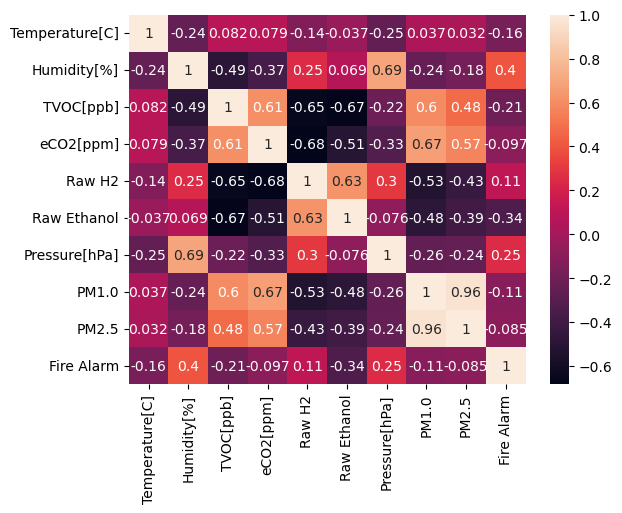

In [164]:
sns.heatmap(df.select_dtypes(np.number).corr(),annot=True)

In [165]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm'],
      dtype='object')

In [168]:
df['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

In [170]:
df.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm'],
      dtype='object')

In [172]:
df1.to_csv("firealaram_classlabels.csv")

In [174]:
df1.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm'],
      dtype='object')

In [176]:
fv=df1.loc[:,['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5']]
cv=df1.loc[:,'Fire Alarm']

In [178]:
fv.shape,cv.shape

((15000, 9), (15000,))

In [180]:
df1['Fire Alarm'].value_counts()

Fire Alarm
1    10719
0     4281
Name: count, dtype: int64

In [182]:
df1.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'Fire Alarm'],
      dtype='object')

In [184]:
fv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 3607 to 23332
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  15000 non-null  float64
 1   Humidity[%]     15000 non-null  float64
 2   TVOC[ppb]       15000 non-null  int64  
 3   eCO2[ppm]       15000 non-null  int64  
 4   Raw H2          15000 non-null  int64  
 5   Raw Ethanol     15000 non-null  int64  
 6   Pressure[hPa]   15000 non-null  float64
 7   PM1.0           15000 non-null  float64
 8   PM2.5           15000 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.1 MB


In [186]:
cont_val=fv.select_dtypes(exclude='object').columns

In [188]:
from sklearn.pipeline import Pipeline

In [190]:
cont_pl=Pipeline(steps=[('Scalinng',RobustScaler()),
                        ('powertransformer',PowerTransformer())])


In [192]:
ct=ColumnTransformer(transformers=[('continuos transformer',cont_pl,[0,1,2,3,4,5,6,7,8,])],remainder='passthrough')

In [194]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,stratify=cv,test_size=0.2)

In [196]:
x_train


,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5
59675,17.842,44.40,157,424,12772,20562,937.419,1.42,1.48
62187,-21.982,11.19,60000,1515,12220,17740,936.723,113.04,126.62
15523,12.118,52.46,1163,438,12868,19433,938.828,1.98,2.06
18728,20.547,49.32,1224,400,12915,19427,938.710,1.51,1.57
13644,19.310,47.10,1051,504,12847,19465,938.858,1.63,1.69
...,...,...,...,...,...,...,...,...,...
46752,24.870,51.89,1354,401,12956,19390,938.698,1.96,2.04
42882,26.570,49.34,1101,400,12911,19456,938.719,1.81,1.88
55628,52.820,21.48,27055,702,12656,18826,936.885,0.72,0.75
34210,20.980,57.08,436,539,12871,19821,939.228,1.62,1.69


In [89]:
y_train.value_counts()

Fire Alarm
1    8575
0    3425
Name: count, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
x_train, y_train = smote.fit_resample(x_train, y_train)


In [93]:
x_train=ct.fit_transform(x_train)
x_test=ct.transform(x_test)

In [95]:
x_train.shape,y_train.shape

((17150, 9), (17150,))

In [97]:
df1.to_csv("firealarm.csv")

# KNN

In [88]:
def objective(trial):
    k1=trial.suggest_int('n_neighbour1',20,150)
    p1=trial.suggest_categorical('distance1',[1,2])
    w1=trial.suggest_categorical('weights1',['uniform','distance'])
    algor1=trial.suggest_categorical('alg1',['ball_tree','kd_tree','brute'])
    model1=KNeighborsClassifier(n_neighbors=k1,p=p1,weights=w1,algorithm=algor1)
    cv_loss=cross_validate(estimator=model1,X=x_train,y=y_train,cv=3,scoring="neg_log_loss")["test_score"].mean()
    train_loss=cross_validate(estimator=model1,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_error",train_loss)

    return cv_loss

In [263]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())

[I 2025-03-19 20:22:13,039] A new study created in memory with name: no-name-82917980-bffc-4854-9432-150e628688bb


In [265]:
study.optimize(objective,n_trials=100, n_jobs = -1)

[I 2025-03-19 20:22:21,900] Trial 9 finished with value: -0.04897127815145772 and parameters: {'n_neighbour1': 122, 'distance1': 1, 'weights1': 'uniform', 'alg1': 'brute'}. Best is trial 9 with value: -0.04897127815145772.
[I 2025-03-19 20:22:22,621] Trial 6 finished with value: -0.04494223031053648 and parameters: {'n_neighbour1': 111, 'distance1': 1, 'weights1': 'uniform', 'alg1': 'brute'}. Best is trial 6 with value: -0.04494223031053648.
[I 2025-03-19 20:22:25,821] Trial 8 finished with value: -0.04897127815145772 and parameters: {'n_neighbour1': 122, 'distance1': 1, 'weights1': 'uniform', 'alg1': 'kd_tree'}. Best is trial 6 with value: -0.04494223031053648.
[I 2025-03-19 20:22:27,758] Trial 11 finished with value: -0.024116239596188884 and parameters: {'n_neighbour1': 37, 'distance1': 1, 'weights1': 'uniform', 'alg1': 'ball_tree'}. Best is trial 11 with value: -0.024116239596188884.
[I 2025-03-19 20:22:28,597] Trial 2 finished with value: -0.029027454617975096 and parameters: {'n_

In [280]:
study.best_params

{'n_neighbour1': 25,
 'distance1': 1,
 'weights1': 'distance',
 'alg1': 'ball_tree'}

In [282]:
study.best_value

-0.017786859866637316

In [285]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alg1,params_distance1,params_n_neighbour1,params_weights1,user_attrs_train_error,state
0,0,-0.019831,2025-03-19 20:22:13.534005,2025-03-19 20:23:32.352014,0 days 00:01:18.818009,brute,1,22,distance,-2.220446e-16,COMPLETE
1,1,-0.056365,2025-03-19 20:22:13.538108,2025-03-19 20:23:54.232005,0 days 00:01:40.693897,brute,2,147,distance,-9.889519e-08,COMPLETE
2,2,-0.029027,2025-03-19 20:22:13.542119,2025-03-19 20:22:28.597877,0 days 00:00:15.055758,ball_tree,1,54,uniform,-1.750888e-02,COMPLETE
3,3,-0.035427,2025-03-19 20:22:13.544227,2025-03-19 20:22:30.010285,0 days 00:00:16.466058,ball_tree,1,73,uniform,-2.404218e-02,COMPLETE
4,4,-0.058674,2025-03-19 20:22:13.549111,2025-03-19 20:23:56.559804,0 days 00:01:43.010693,brute,2,94,uniform,-4.694815e-02,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.019134,2025-03-19 20:26:41.168645,2025-03-19 20:27:11.657072,0 days 00:00:30.488427,ball_tree,1,31,distance,-2.220446e-16,COMPLETE
96,96,-0.018886,2025-03-19 20:26:41.869449,2025-03-19 20:27:11.837668,0 days 00:00:29.968219,ball_tree,1,30,distance,-2.220446e-16,COMPLETE
97,97,-0.018886,2025-03-19 20:26:51.733668,2025-03-19 20:27:15.440176,0 days 00:00:23.706508,ball_tree,1,30,distance,-2.220446e-16,COMPLETE
98,98,-0.018734,2025-03-19 20:26:57.756197,2025-03-19 20:27:16.838089,0 days 00:00:19.081892,ball_tree,1,29,distance,-2.220446e-16,COMPLETE


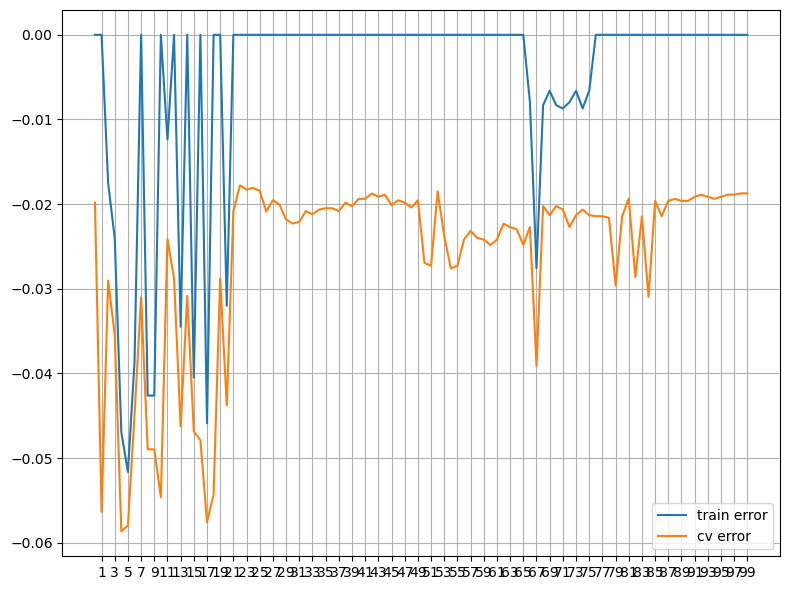

In [287]:
plt.figure(figsize=(8,6))
plt.plot(study.trials_dataframe()['number'],study.trials_dataframe()['user_attrs_train_error'],label='train error')
plt.plot(study.trials_dataframe()['number'],study.trials_dataframe()['value'],label='cv error')
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# Dummy model

In [271]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
log_loss(y_test,dm.predict_proba(x_test))

10.284455767028094

In [289]:
study.trials_dataframe().iloc[5]

number                                             5
value                                      -0.057971
datetime_start            2025-03-19 20:22:13.550111
datetime_complete         2025-03-19 20:22:37.181071
duration                      0 days 00:00:23.630960
params_alg1                                ball_tree
params_distance1                                   1
params_n_neighbour1                              147
params_weights1                              uniform
user_attrs_train_error                     -0.051643
state                                       COMPLETE
Name: 5, dtype: object

In [291]:
Knn=KNeighborsClassifier(n_neighbors=147,weights='uniform',algorithm='ball_tree',p=1)
Knn.fit(x_train,y_train)
y_cap=Knn.predict_proba(x_test)
log_loss(y_test,y_cap)

0.0316726730270617

# Decision Tree

In [294]:
def objective(trial):
    depth1=trial.suggest_int('depth',2,10)
    sample_split1=trial.suggest_int('sample_splits',2,10)
    sample_leaf1=trial.suggest_int('sample_leaf',2,10)
    min_impurity1=trial.suggest_float('impurity_dec',0.0,0.5)
    m_feature1=trial.suggest_categorical('max_f',['sqrt','log2'])
    model=DecisionTreeClassifier(max_depth=depth1,min_samples_split=sample_split1,min_samples_leaf=sample_leaf1,
                                 min_impurity_decrease=min_impurity1,max_features=m_feature1)
    cv_error=cross_validate(estimator=model,X=x_train,y=y_train,cv=3,scoring="neg_log_loss")["test_score"].mean()
    train_error=cross_validate(estimator=model,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_error",train_error
                       )

    return cv_error   

In [296]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())

[I 2025-03-19 20:31:56,828] A new study created in memory with name: no-name-9d991c74-38ed-4260-8eaa-3303265de5f4


In [298]:
study.optimize(objective,n_trials=100, n_jobs =-1)

[I 2025-03-19 20:31:58,719] Trial 6 finished with value: -0.5979967085105168 and parameters: {'depth': 4, 'sample_splits': 4, 'sample_leaf': 5, 'impurity_dec': 0.44263507294874455, 'max_f': 'log2'}. Best is trial 6 with value: -0.5979967085105168.
[I 2025-03-19 20:31:58,731] Trial 1 finished with value: -0.5979967085105168 and parameters: {'depth': 7, 'sample_splits': 9, 'sample_leaf': 6, 'impurity_dec': 0.3161611148945883, 'max_f': 'log2'}. Best is trial 6 with value: -0.5979967085105168.
[I 2025-03-19 20:31:58,734] Trial 3 finished with value: -0.36732302470563116 and parameters: {'depth': 8, 'sample_splits': 6, 'sample_leaf': 3, 'impurity_dec': 0.09294013911640336, 'max_f': 'sqrt'}. Best is trial 3 with value: -0.36732302470563116.
[I 2025-03-19 20:31:58,779] Trial 8 finished with value: -0.3787467537019633 and parameters: {'depth': 10, 'sample_splits': 6, 'sample_leaf': 6, 'impurity_dec': 0.1220924565416106, 'max_f': 'log2'}. Best is trial 3 with value: -0.36732302470563116.
[I 202

In [299]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_depth,params_impurity_dec,params_max_f,params_sample_leaf,params_sample_splits,user_attrs_train_error,state
0,0,-0.516178,2025-03-19 20:31:57.693794,2025-03-19 20:31:58.863253,0 days 00:00:01.169459,8,0.182367,log2,6,3,-0.597997,COMPLETE
1,1,-0.597997,2025-03-19 20:31:57.698840,2025-03-19 20:31:58.731701,0 days 00:00:01.032861,7,0.316161,log2,6,9,-0.597997,COMPLETE
2,2,-0.384009,2025-03-19 20:31:57.702072,2025-03-19 20:31:58.914328,0 days 00:00:01.212256,6,0.112476,sqrt,10,2,-0.374583,COMPLETE
3,3,-0.367323,2025-03-19 20:31:57.706161,2025-03-19 20:31:58.734708,0 days 00:00:01.028547,8,0.092940,sqrt,3,6,-0.531592,COMPLETE
4,4,-0.367323,2025-03-19 20:31:57.712268,2025-03-19 20:31:58.963391,0 days 00:00:01.251123,8,0.087315,log2,2,5,-0.321229,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.148418,2025-03-19 20:32:11.747296,2025-03-19 20:32:12.220041,0 days 00:00:00.472745,5,0.008808,sqrt,2,7,-0.092592,COMPLETE
96,96,-0.149372,2025-03-19 20:32:11.869817,2025-03-19 20:32:12.278074,0 days 00:00:00.408257,5,0.042632,sqrt,2,7,-0.174672,COMPLETE
97,97,-0.130206,2025-03-19 20:32:11.874812,2025-03-19 20:32:12.283073,0 days 00:00:00.408261,5,0.045401,sqrt,6,7,-0.297810,COMPLETE
98,98,-0.093767,2025-03-19 20:32:11.887813,2025-03-19 20:32:12.293076,0 days 00:00:00.405263,5,0.012800,sqrt,2,7,-0.071191,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_9112\1084540511.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


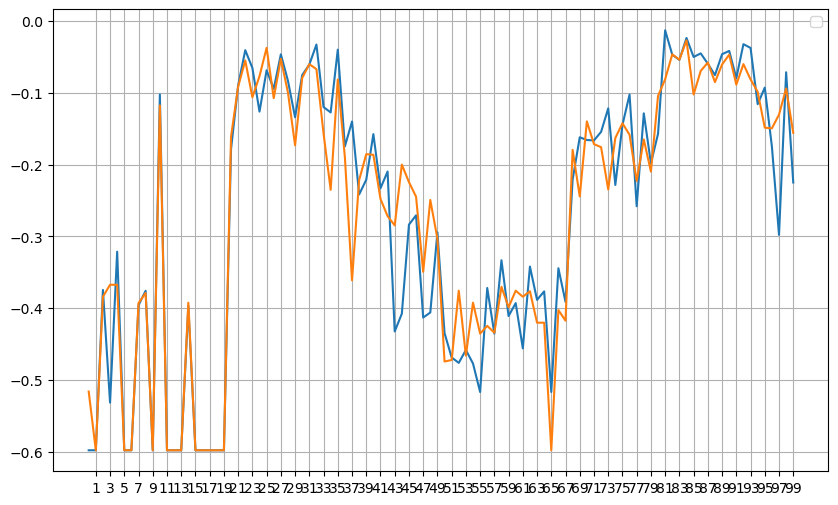

In [303]:
plt.figure(figsize=(10,6))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_error"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

# Dummy model

In [306]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
log_loss(y_test,dm.predict_proba(x_test))

10.284455767028094

In [312]:
study.trials_dataframe().iloc[6]

number                                             6
value                                      -0.597997
datetime_start            2025-03-19 20:31:57.714608
datetime_complete         2025-03-19 20:31:58.718353
duration                      0 days 00:00:01.003745
params_depth                                       4
params_impurity_dec                         0.442635
params_max_f                                    log2
params_sample_leaf                                 5
params_sample_splits                               4
user_attrs_train_error                     -0.597997
state                                       COMPLETE
Name: 6, dtype: object

In [314]:
study.trials_dataframe().iloc[28]

number                                            28
value                                      -0.099652
datetime_start            2025-03-19 20:32:00.410411
datetime_complete         2025-03-19 20:32:02.211311
duration                      0 days 00:00:01.800900
params_depth                                       5
params_impurity_dec                         0.005876
params_max_f                                    sqrt
params_sample_leaf                                 2
params_sample_splits                               7
user_attrs_train_error                     -0.083188
state                                       COMPLETE
Name: 28, dtype: object

In [316]:
dt=DecisionTreeClassifier(max_depth=4,min_samples_split=4,min_samples_leaf=5,
                                 min_impurity_decrease=0.442635,max_features='log2')
dt.fit(x_train,y_train)
y_cap=dt.predict_proba(x_test)
log_loss(y_test,y_cap)

0.5979201868243866

In [318]:
dt=DecisionTreeClassifier(max_depth=5,min_samples_split=7,min_samples_leaf=2,
                                 min_impurity_decrease=0.005876,max_features='sqrt')
dt.fit(x_train,y_train)
y_cap=dt.predict_proba(x_test)
log_loss(y_test,y_cap)

0.16730942959780468

# Voting ensemble technique

In [90]:
def objective(trial):
    k1=trial.suggest_int('n_neighbour1',1,20)
    p1=trial.suggest_categorical('distance1',[1,2])
    w1=trial.suggest_categorical('weights1',['uniform','distance'])
    algor1=trial.suggest_categorical('alg1',['ball_tree','kd_tree','brute'])
    model1=KNeighborsClassifier(n_neighbors=k1,p=p1,weights=w1,algorithm=algor1)

    k2=trial.suggest_int('n_neighbour2',50,150)
    p2=trial.suggest_categorical('distance2',[1,2])
    w2=trial.suggest_categorical('weights2',['uniform','distance'])
    algor2=trial.suggest_categorical('alg2',['ball_tree','kd_tree','brute'])
    model2=KNeighborsClassifier(n_neighbors=k2,p=p2,weights=w2,algorithm=algor2)

    depth1=trial.suggest_int('depth',2,12)
    sample_split1=trial.suggest_int('sample_splits',2,15)
    sample_leaf1=trial.suggest_int('sample_leaf',2,15)
    min_impurity1=trial.suggest_float('impurity_dec',0.0,0.5)
    m_feature1=trial.suggest_categorical('max_f',['sqrt','log2'])
    model3=DecisionTreeClassifier(max_depth=depth1,min_samples_split=sample_split1,min_samples_leaf=sample_leaf1,
                                 min_impurity_decrease=min_impurity1,max_features=m_feature1)
    
    vc=VotingClassifier(estimators=[('knn1',model1),('knn2',model2),('dt',model3)],n_jobs=-1,voting='soft')
    cv_error=cross_validate(estimator=vc,X=x_train,y=y_train,cv=3,scoring="neg_log_loss")["test_score"].mean()
    train_error=cross_validate(estimator=vc,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_error",train_error)

    return cv_error

In [92]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-27 10:35:51,508] A new study created in memory with name: no-name-f491149d-2042-4736-a68c-bcd5c6662010
[I 2025-03-27 10:35:59,983] Trial 0 finished with value: -0.19024401290123916 and parameters: {'n_neighbour1': 18, 'distance1': 1, 'weights1': 'distance', 'alg1': 'kd_tree', 'n_neighbour2': 136, 'distance2': 1, 'weights2': 'distance', 'alg2': 'kd_tree', 'depth': 11, 'sample_splits': 3, 'sample_leaf': 8, 'impurity_dec': 0.2125104997853921, 'max_f': 'sqrt'}. Best is trial 0 with value: -0.19024401290123916.
[I 2025-03-27 10:36:04,711] Trial 12 finished with value: -0.19043749327896706 and parameters: {'n_neighbour1': 20, 'distance1': 2, 'weights1': 'uniform', 'alg1': 'kd_tree', 'n_neighbour2': 76, 'distance2': 1, 'weights2': 'uniform', 'alg2': 'kd_tree', 'depth': 3, 'sample_splits': 14, 'sample_leaf': 5, 'impurity_dec': 0.30777692530557427, 'max_f': 'sqrt'}. Best is trial 0 with value: -0.19024401290123916.
[I 2025-03-27 10:36:06,068] Trial 1 finished with value: -0.189266210

In [94]:
study.best_params

{'n_neighbour1': 1,
 'distance1': 2,
 'weights1': 'distance',
 'alg1': 'ball_tree',
 'n_neighbour2': 50,
 'distance2': 1,
 'weights2': 'uniform',
 'alg2': 'ball_tree',
 'depth': 5,
 'sample_splits': 7,
 'sample_leaf': 15,
 'impurity_dec': 0.0003990835285267863,
 'max_f': 'log2'}

In [96]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alg1,params_alg2,params_depth,params_distance1,params_distance2,params_impurity_dec,params_max_f,params_n_neighbour1,params_n_neighbour2,params_sample_leaf,params_sample_splits,params_weights1,params_weights2,user_attrs_train_error,state
0,0,-0.190244,2025-03-27 10:35:51.510987,2025-03-27 10:35:59.983549,0 days 00:00:08.472562,kd_tree,kd_tree,11,1,1,0.212510,sqrt,18,136,8,3,distance,distance,-0.102804,COMPLETE
1,1,-0.189266,2025-03-27 10:35:51.513041,2025-03-27 10:36:06.067515,0 days 00:00:14.554474,kd_tree,ball_tree,7,2,1,0.241029,sqrt,13,69,7,3,uniform,uniform,-0.188579,COMPLETE
2,2,-0.191074,2025-03-27 10:35:51.514048,2025-03-27 10:36:14.498250,0 days 00:00:22.984202,ball_tree,ball_tree,5,1,2,0.375247,sqrt,7,135,12,12,uniform,distance,-0.182888,COMPLETE
3,3,-0.187732,2025-03-27 10:35:51.515082,2025-03-27 10:36:15.940060,0 days 00:00:24.424978,brute,ball_tree,12,2,2,0.392365,log2,9,59,3,4,uniform,distance,-0.183218,COMPLETE
4,4,-0.122725,2025-03-27 10:35:51.517080,2025-03-27 10:36:09.386300,0 days 00:00:17.869220,kd_tree,brute,9,1,1,0.130510,sqrt,19,95,8,12,uniform,distance,-0.117659,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.025965,2025-03-27 10:38:00.843077,2025-03-27 10:38:16.125624,0 days 00:00:15.282547,ball_tree,ball_tree,4,2,1,0.002846,log2,1,104,7,6,distance,uniform,-0.019000,COMPLETE
96,96,-0.023222,2025-03-27 10:38:01.016297,2025-03-27 10:38:15.544503,0 days 00:00:14.528206,ball_tree,ball_tree,4,2,1,0.005166,log2,1,80,9,7,distance,uniform,-0.029952,COMPLETE
97,97,-0.032526,2025-03-27 10:38:02.245211,2025-03-27 10:38:15.560666,0 days 00:00:13.315455,ball_tree,ball_tree,4,2,1,0.000103,log2,1,56,7,7,distance,uniform,-0.030218,COMPLETE
98,98,-0.043782,2025-03-27 10:38:04.331905,2025-03-27 10:38:16.321464,0 days 00:00:11.989559,ball_tree,ball_tree,11,2,1,0.054811,log2,1,53,9,7,distance,uniform,-0.052577,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_13440\2373677666.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


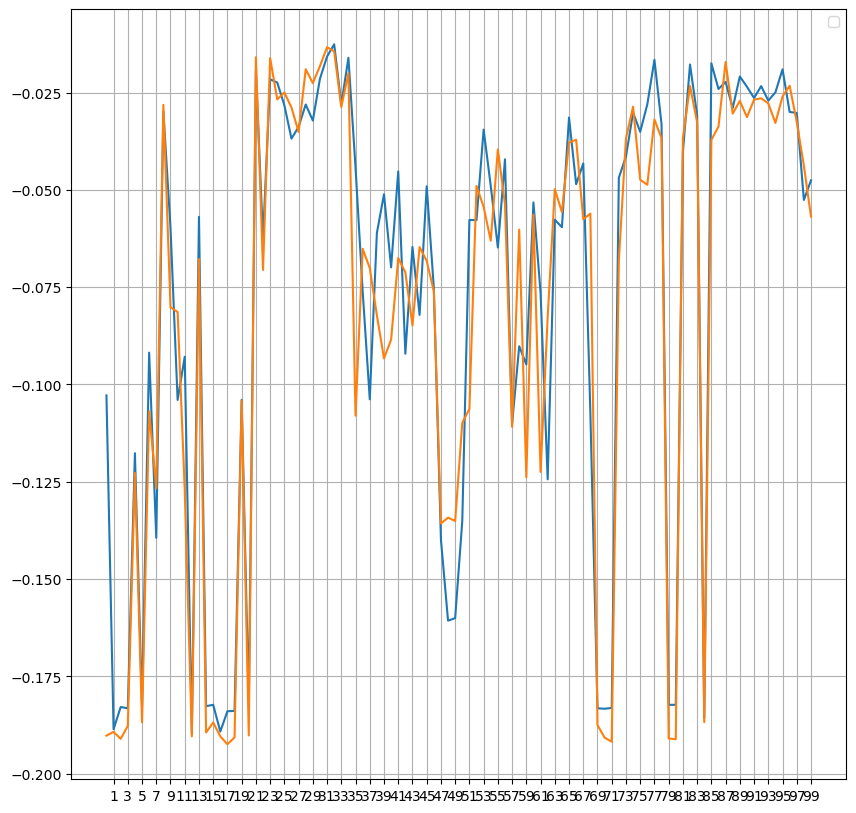

In [98]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_error"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13440\1301127239.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


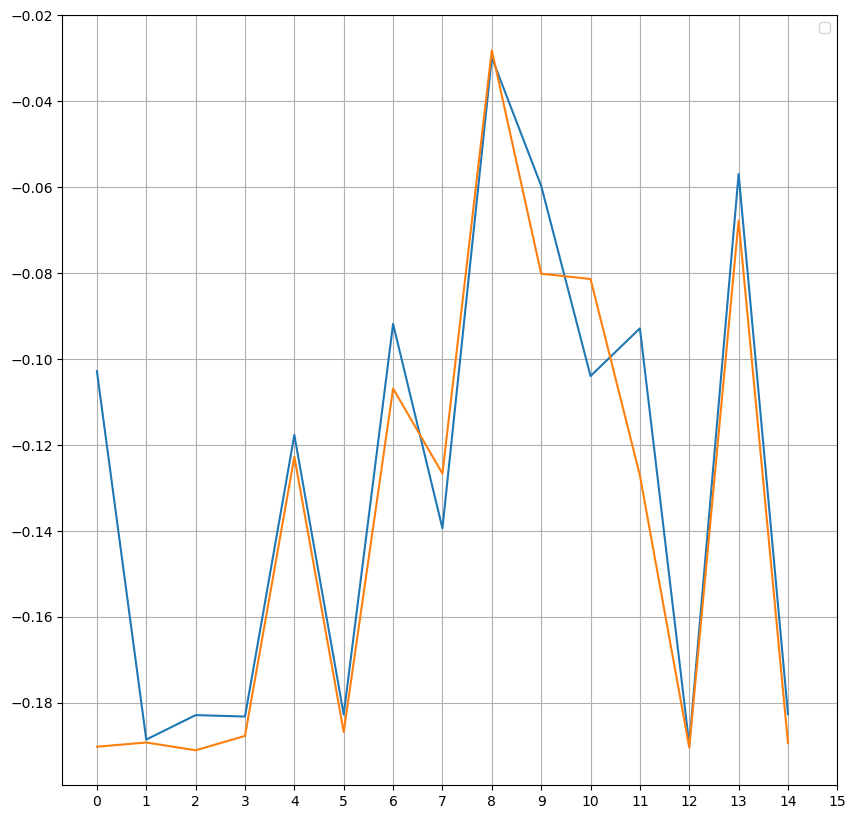

In [100]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"][0:15],study.trials_dataframe()["user_attrs_train_error"][0:15])
plt.plot(study.trials_dataframe()["number"][0:15],study.trials_dataframe()["value"][0:15])
plt.xticks(range(0,16))
plt.grid()
plt.legend()
plt.show()

In [102]:
study.trials_dataframe().iloc[8]

number                                             8
value                                      -0.028135
datetime_start            2025-03-27 10:35:51.528327
datetime_complete         2025-03-27 10:36:12.981381
duration                      0 days 00:00:21.453054
params_alg1                                    brute
params_alg2                                ball_tree
params_depth                                       8
params_distance1                                   2
params_distance2                                   1
params_impurity_dec                         0.019182
params_max_f                                    log2
params_n_neighbour1                               14
params_n_neighbour2                               73
params_sample_leaf                                 6
params_sample_splits                               5
params_weights1                             distance
params_weights2                              uniform
user_attrs_train_error                     -0.

# Dummy model

In [104]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
log_loss(y_test,dm.predict_proba(x_test))

25.759197622089054

In [106]:

vc=VotingClassifier(estimators=[('knn1',KNeighborsClassifier(n_neighbors=14,weights='distance',algorithm='brute',p=2)),
                               ('knn2',KNeighborsClassifier(n_neighbors=73,weights='uniform',algorithm='ball_tree',p=1)),
                               ('dt',DecisionTreeClassifier(max_depth=8,min_samples_split=5,min_samples_leaf=6,
                                 min_impurity_decrease= 0.019182,max_features='log2'))],n_jobs=-1,voting='soft')
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('knn1',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=14,
                                                   weights='distance')),
                             ('knn2',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_neighbors=73, p=1)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=8,
                                                     max_features='log2',
                                                     min_impurity_decrease=0.019182,
                                                     min_samples_leaf=6,
                                                     min_samples_split=5))],
                 n_jobs=-1, voting='soft')

In [108]:
y_cap=vc.predict_proba(x_test)


In [110]:
log_loss(y_test,y_cap)

0.07823050337902182

# Bagging ensemble technique

In [112]:
def objective(trial):
    base_model = trial.suggest_categorical("base_model",["decision_tree","knn"])
    if base_model == "knn":
        k=trial.suggest_int('n_neighbors',3,10)
        p1=trial.suggest_categorical('distance',[1,2])
        w=trial.suggest_categorical('weights',['uniform','distance'])
        algor=trial.suggest_categorical('alg',['ball_tree','kd_tree','brute'])
  
        model=KNeighborsClassifier(n_neighbors=k,p=p1,weights=w,algorithm=algor)

    elif base_model == "decision_tree":
        min_split = trial.suggest_int("min_samples_split",2,5)
        min_leaf = trial.suggest_int("min_samples_leaf",1,2)

        model = DecisionTreeClassifier(min_samples_split= min_split, min_samples_leaf=min_leaf)
    
    
    n_estimators1=trial.suggest_int('n_estimator',2,50)
    max_samples1=trial.suggest_int('samples',200,1000)
        
   

    be=BaggingClassifier(estimator=model,n_estimators=n_estimators1,max_samples=max_samples1)
    
    cv_error =cross_validate(estimator=be,X=x_train,y=y_train,cv=4,scoring="neg_log_loss")["test_score"].mean()
    train_error=cross_validate(estimator=be,X=x_train,y=y_train,cv=4,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    
    trial.set_user_attr("train_error",train_error)

    return cv_error

In [114]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-27 10:48:38,054] A new study created in memory with name: no-name-48212d89-3dd5-4001-aeb5-b55eb1710d3e
[I 2025-03-27 10:48:42,400] Trial 9 finished with value: -0.014585635459303664 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_estimator': 14, 'samples': 793}. Best is trial 9 with value: -0.014585635459303664.
[I 2025-03-27 10:48:42,972] Trial 0 finished with value: -0.029077919887341236 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 3, 'min_samples_leaf': 2, 'n_estimator': 17, 'samples': 347}. Best is trial 9 with value: -0.014585635459303664.
[I 2025-03-27 10:48:43,098] Trial 1 finished with value: -0.022893474517542433 and parameters: {'base_model': 'decision_tree', 'min_samples_split': 5, 'min_samples_leaf': 1, 'n_estimator': 18, 'samples': 435}. Best is trial 9 with value: -0.014585635459303664.
[I 2025-03-27 10:48:43,909] Trial 7 finished with value: -0.04284700537593978 and parameters: {'base_mo

In [116]:
study.best_params


{'base_model': 'knn',
 'n_neighbors': 3,
 'distance': 1,
 'weights': 'distance',
 'alg': 'ball_tree',
 'n_estimator': 28,
 'samples': 1000}

In [118]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_alg,params_base_model,params_distance,params_min_samples_leaf,params_min_samples_split,params_n_estimator,params_n_neighbors,params_samples,params_weights,user_attrs_train_error,state
0,0,-0.029078,2025-03-27 10:48:38.061922,2025-03-27 10:48:42.971066,0 days 00:00:04.909144,NaN,decision_tree,NaN,2.0,3.0,17,NaN,347,NaN,-0.024904,COMPLETE
1,1,-0.022893,2025-03-27 10:48:38.065359,2025-03-27 10:48:43.096679,0 days 00:00:05.031320,NaN,decision_tree,NaN,1.0,5.0,18,NaN,435,NaN,-0.022299,COMPLETE
2,2,-0.029477,2025-03-27 10:48:38.067366,2025-03-27 10:49:26.845016,0 days 00:00:48.777650,kd_tree,knn,1.0,NaN,NaN,42,8.0,744,uniform,-0.027340,COMPLETE
3,3,-0.065771,2025-03-27 10:48:38.069922,2025-03-27 10:48:59.859769,0 days 00:00:21.789847,kd_tree,knn,2.0,NaN,NaN,24,6.0,305,uniform,-0.067358,COMPLETE
4,4,-0.036781,2025-03-27 10:48:38.071916,2025-03-27 10:49:57.539901,0 days 00:01:19.467985,ball_tree,knn,1.0,NaN,NaN,45,9.0,625,uniform,-0.034957,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.010899,2025-03-27 10:53:11.049626,2025-03-27 10:54:02.277455,0 days 00:00:51.227829,ball_tree,knn,1.0,NaN,NaN,46,3.0,999,distance,-0.008174,COMPLETE
96,96,-0.011355,2025-03-27 10:53:11.562712,2025-03-27 10:54:04.277525,0 days 00:00:52.714813,ball_tree,knn,1.0,NaN,NaN,46,3.0,933,distance,-0.008428,COMPLETE
97,97,-0.017022,2025-03-27 10:53:12.753496,2025-03-27 10:53:37.718384,0 days 00:00:24.964888,ball_tree,knn,1.0,NaN,NaN,16,7.0,999,distance,-0.014676,COMPLETE
98,98,-0.019272,2025-03-27 10:53:15.058046,2025-03-27 10:53:44.597961,0 days 00:00:29.539915,ball_tree,knn,1.0,NaN,NaN,19,8.0,940,distance,-0.016520,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_13440\4007827545.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


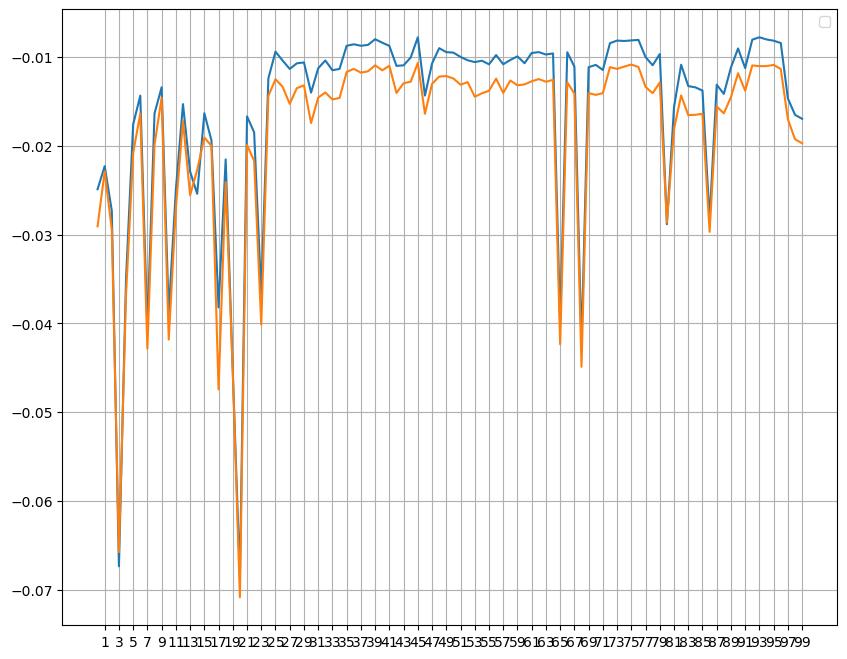

In [120]:
plt.figure(figsize=(10,8))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_error"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13440\356446882.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


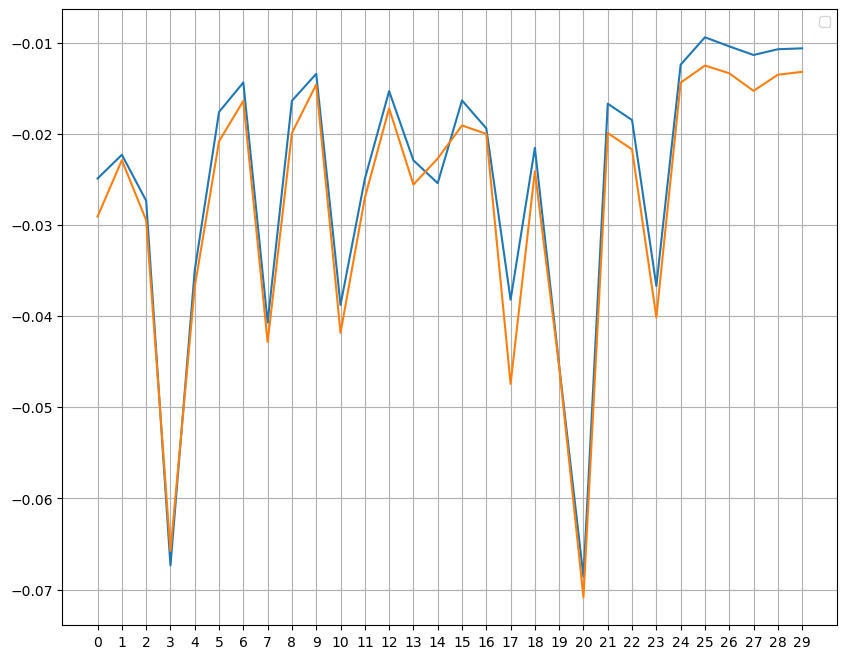

In [132]:
plt.figure(figsize=(10,8))
plt.plot(study.trials_dataframe()["number"][0:30],study.trials_dataframe()["user_attrs_train_error"][0:30])
plt.plot(study.trials_dataframe()["number"][0:30],study.trials_dataframe()["value"][0:30])
plt.xticks(range(0,30))
plt.grid()
plt.legend()
plt.show()

# Dummy

In [134]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
log_loss(y_test,dm.predict_proba(x_test))

25.759197622089054

In [136]:
study.trials_dataframe().iloc[16]

number                                              16
value                                        -0.020007
datetime_start              2025-03-27 10:48:45.068863
datetime_complete           2025-03-27 10:48:49.141935
duration                        0 days 00:00:04.073072
params_alg                                         NaN
params_base_model                        decision_tree
params_distance                                    NaN
params_min_samples_leaf                            1.0
params_min_samples_split                           2.0
params_n_estimator                                  15
params_n_neighbors                                 NaN
params_samples                                     496
params_weights                                     NaN
user_attrs_train_error                       -0.019398
state                                         COMPLETE
Name: 16, dtype: object

In [90]:
# be=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=46,weights='uniform',algorithm='kd_tree',p=1)
#                     ,n_estimators=41,bootstrap=True,max_samples=934)
# be.fit(x_train,y_train)

BaggingClassifier(estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                 n_neighbors=46, p=1),
                  max_samples=934, n_estimators=41)

In [138]:
be = BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1), 
                       n_estimators=15, max_samples=496)
be.fit(x_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=496,
                  n_estimators=15)

In [140]:
yi_cap=be.predict_proba(x_test)

In [142]:
log_loss(y_test,yi_cap)

0.016521497567257834

# Random Forest

In [144]:
def objective(trial):
    sample_split1=trial.suggest_int('sample_splits',2,18)
    sample_leaf1=trial.suggest_int('sample_leaf',2,18)
    m_feature1=trial.suggest_categorical('max_f',['sqrt','log2'])
    n_estimators1=trial.suggest_int('n_estimator',2,50)
    max_samples1=trial.suggest_int('samples',200,1000)
    min_impurity1=trial.suggest_float('impurity_dec',0.01,0.1)
    
    rf=RandomForestClassifier(n_estimators=n_estimators1,max_features=m_feature1,max_samples=max_samples1,
                              bootstrap=True,min_samples_split=sample_split1,min_samples_leaf=sample_leaf1,
                                 min_impurity_decrease=min_impurity1)
    cv_error=cross_validate(estimator=rf,X=x_train,y=y_train,cv=3,scoring="neg_log_loss")["test_score"].mean()
    train_error=cross_validate(estimator=rf,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    trial.set_user_attr("train_error",train_error)

    return cv_error

In [146]:
study=optuna.create_study(direction='maximize',sampler=optuna.samplers.TPESampler())
study.optimize(objective,n_trials=100,n_jobs=-1)

[I 2025-03-27 11:01:01,754] A new study created in memory with name: no-name-3f14e0e6-d109-45fc-9ea6-862710e48374
[I 2025-03-27 11:01:02,784] Trial 1 finished with value: -0.14922878988322458 and parameters: {'sample_splits': 9, 'sample_leaf': 11, 'max_f': 'log2', 'n_estimator': 4, 'samples': 889, 'impurity_dec': 0.035389174323463196}. Best is trial 1 with value: -0.14922878988322458.
[I 2025-03-27 11:01:03,864] Trial 0 finished with value: -0.28590850946875185 and parameters: {'sample_splits': 15, 'sample_leaf': 13, 'max_f': 'sqrt', 'n_estimator': 16, 'samples': 582, 'impurity_dec': 0.08549638258196451}. Best is trial 1 with value: -0.14922878988322458.
[I 2025-03-27 11:01:03,984] Trial 6 finished with value: -0.15230591334437663 and parameters: {'sample_splits': 12, 'sample_leaf': 7, 'max_f': 'sqrt', 'n_estimator': 16, 'samples': 879, 'impurity_dec': 0.0390272705952047}. Best is trial 1 with value: -0.14922878988322458.
[I 2025-03-27 11:01:04,019] Trial 2 finished with value: -0.1989

In [147]:
study.best_params

{'sample_splits': 4,
 'sample_leaf': 3,
 'max_f': 'log2',
 'n_estimator': 22,
 'samples': 520,
 'impurity_dec': 0.010239531230609524}

In [148]:
study.trials_dataframe()


,number,value,datetime_start,datetime_complete,duration,params_impurity_dec,params_max_f,params_n_estimator,params_sample_leaf,params_sample_splits,params_samples,user_attrs_train_error,state
0,0,-0.285909,2025-03-27 11:01:01.758658,2025-03-27 11:01:03.864564,0 days 00:00:02.105906,0.085496,sqrt,16,13,15,582,-0.249774,COMPLETE
1,1,-0.149229,2025-03-27 11:01:01.762660,2025-03-27 11:01:02.784817,0 days 00:00:01.022157,0.035389,log2,4,11,9,889,-0.131764,COMPLETE
2,2,-0.198957,2025-03-27 11:01:01.764655,2025-03-27 11:01:04.018122,0 days 00:00:02.253467,0.049465,log2,17,7,9,325,-0.193764,COMPLETE
3,3,-0.215890,2025-03-27 11:01:01.765656,2025-03-27 11:01:04.867068,0 days 00:00:03.101412,0.074623,sqrt,24,14,8,809,-0.250913,COMPLETE
4,4,-0.199912,2025-03-27 11:01:01.766655,2025-03-27 11:01:04.098943,0 days 00:00:02.332288,0.067604,sqrt,17,10,17,336,-0.213715,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,-0.074812,2025-03-27 11:01:33.472860,2025-03-27 11:01:35.477256,0 days 00:00:02.004396,0.012355,log2,20,2,5,631,-0.075156,COMPLETE
96,96,-0.082731,2025-03-27 11:01:33.506270,2025-03-27 11:01:35.625426,0 days 00:00:02.119156,0.012872,log2,27,2,12,677,-0.079803,COMPLETE
97,97,-0.079786,2025-03-27 11:01:33.693837,2025-03-27 11:01:35.451051,0 days 00:00:01.757214,0.012664,log2,19,5,5,586,-0.086996,COMPLETE
98,98,-0.084324,2025-03-27 11:01:33.706207,2025-03-27 11:01:35.692790,0 days 00:00:01.986583,0.013007,log2,28,5,5,625,-0.084641,COMPLETE


C:\Users\HP\AppData\Local\Temp\ipykernel_13440\2373677666.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


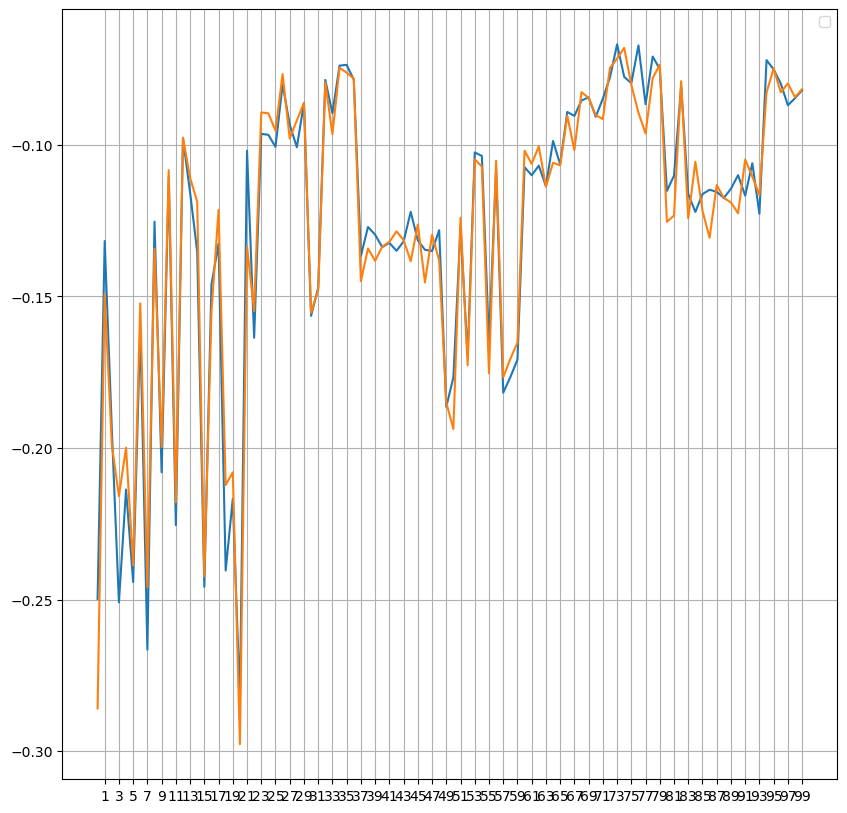

In [152]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["user_attrs_train_error"])
plt.plot(study.trials_dataframe()["number"],study.trials_dataframe()["value"])
plt.xticks(range(1,100,2))
plt.grid()
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13440\638863180.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


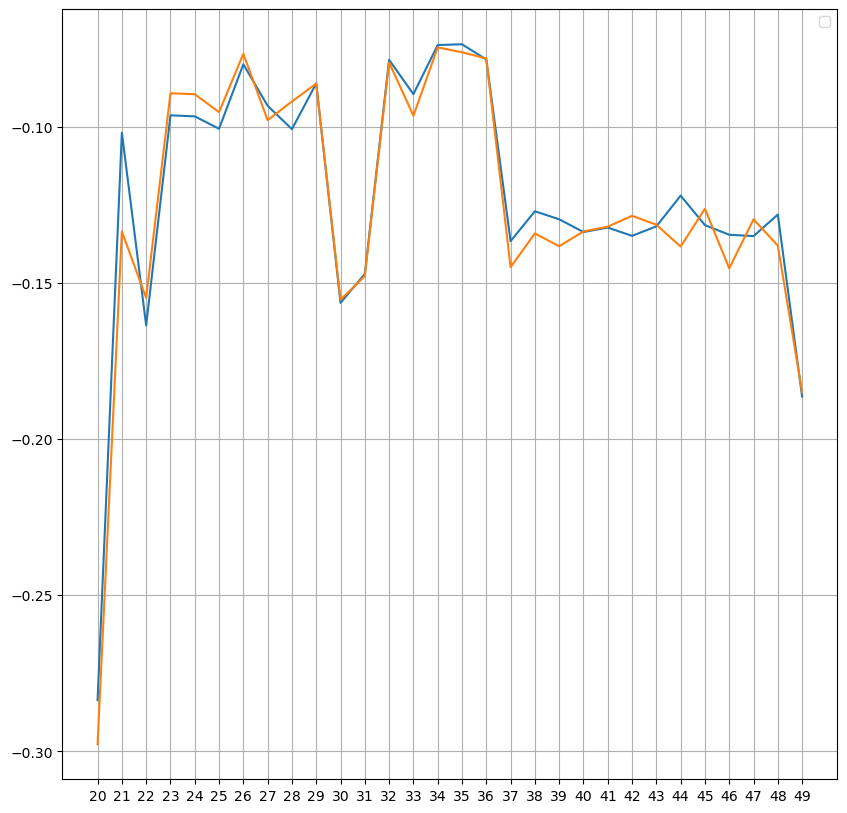

In [158]:
plt.figure(figsize=(10,10))
plt.plot(study.trials_dataframe()["number"][20:50],study.trials_dataframe()["user_attrs_train_error"][20:50])
plt.plot(study.trials_dataframe()["number"][20:50],study.trials_dataframe()["value"][20:50])
plt.xticks(range(20,50))
plt.grid()
plt.legend()
plt.show()

In [160]:
study.trials_dataframe().iloc[32]

number                                            32
value                                      -0.079457
datetime_start            2025-03-27 11:01:08.899511
datetime_complete         2025-03-27 11:01:14.865687
duration                      0 days 00:00:05.966176
params_impurity_dec                         0.010195
params_max_f                                    sqrt
params_n_estimator                                50
params_sample_leaf                                 5
params_sample_splits                               5
params_samples                                   516
user_attrs_train_error                     -0.078632
state                                       COMPLETE
Name: 32, dtype: object

# dummy

In [163]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train,y_train)
log_loss(y_test,dm.predict_proba(x_test))

25.759197622089054

In [84]:
rf=RandomForestClassifier(n_estimators=50,max_features='sqrt',max_samples=516,
                              bootstrap=True,min_samples_split=5,min_samples_leaf=5,
                                 min_impurity_decrease=0.010195)
rf.fit(x_train,y_train)

RandomForestClassifier(max_samples=516, min_impurity_decrease=0.010195,
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=50)

In [86]:
yi_cap=rf.predict_proba(x_test)
log_loss(y_test,yi_cap)


0.09176276957399451

# Logistic Regression

In [310]:
# def objective(trial):
#     obj1=trial.suggest_categorical('obj',[('liblinear','l1'),('liblinear','l2'),('newton-cholesky','l2')])
#     c=trial.suggest_categorical('C',[0.001,0.01,0.1,10,100])
#     lor=LogisticRegression(penalty=obj1[1],solver=obj1[0],C=c)
    
#     cv_loss=cross_validate(estimator=lor,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["test_score"].mean()
#     train_loss=cross_validate(estimator=lor,X=x_train,y=y_train,cv=3,scoring="neg_log_loss",return_train_score=True)["train_score"].mean()
    
#     trial.set_user_attr("trainning loss",train_loss)
    
#     return cv_loss
    

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
def objective(trial):
    poly_degree = trial.suggest_int("poly_degree", 1, 3) 

    
    poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)    
    obj1 = trial.suggest_categorical('obj', [('liblinear', 'l1'), ('liblinear', 'l2'), ('newton-cholesky', 'l2')])
    c = trial.suggest_categorical('C', [0.001, 0.01, 0.1, 10, 100])   
    lor = LogisticRegression(penalty=obj1[1], solver=obj1[0], C=c, max_iter=1000)    
    cv_loss = cross_validate(estimator=lor, X=x_train_poly, y=y_train, cv=3, scoring="neg_log_loss", return_train_score=True)["test_score"].mean()
    train_loss = cross_validate(estimator=lor, X=x_train_poly, y=y_train, cv=3, scoring="neg_log_loss", return_train_score=True)["train_score"].mean()    
    trial.set_user_attr("training_loss", train_loss)
    
    return cv_loss


In [92]:
study=optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler())

[I 2025-03-27 11:26:27,621] A new study created in memory with name: no-name-29cf7713-e643-4921-ba4f-145101c736c7


In [94]:
study.optimize(objective,n_trials=100, n_jobs=-1)

C:\Users\HP\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l1') which is of type tuple.
  warnings.warn(message)
C:\Users\HP\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('liblinear', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\HP\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('newton-cholesky', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\HP\anaconda3\Lib\site-packages\optuna\distributions.py:515: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, f

In [319]:
study.best_params

{'poly_degree': 3, 'obj': ('newton-cholesky', 'l2'), 'C': 100}

In [320]:
study.best_trial

FrozenTrial(number=31, state=1, values=[-0.001161887888523275], datetime_start=datetime.datetime(2025, 3, 21, 0, 24, 47, 313940), datetime_complete=datetime.datetime(2025, 3, 21, 0, 25, 23, 220905), params={'poly_degree': 3, 'obj': ('newton-cholesky', 'l2'), 'C': 100}, user_attrs={'training_loss': -0.00014729284525805312}, system_attrs={}, intermediate_values={}, distributions={'poly_degree': IntDistribution(high=3, log=False, low=1, step=1), 'obj': CategoricalDistribution(choices=(('liblinear', 'l1'), ('liblinear', 'l2'), ('newton-cholesky', 'l2'))), 'C': CategoricalDistribution(choices=(0.001, 0.01, 0.1, 10, 100))}, trial_id=31, value=None)

In [96]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_C,params_obj,params_poly_degree,user_attrs_training_loss,state
0,0,-0.002224,2025-03-27 11:26:28.196622,2025-03-27 11:26:34.689527,0 days 00:00:06.492905,100.000,"(newton-cholesky, l2)",3,-0.000174,COMPLETE
1,1,-0.004722,2025-03-27 11:26:28.198776,2025-03-27 11:26:51.911300,0 days 00:00:23.712524,10.000,"(liblinear, l1)",2,-0.001085,COMPLETE
2,2,-0.004308,2025-03-27 11:26:28.199808,2025-03-27 11:26:34.841294,0 days 00:00:06.641486,10.000,"(newton-cholesky, l2)",3,-0.000631,COMPLETE
3,3,-0.440513,2025-03-27 11:26:28.213905,2025-03-27 11:26:30.724097,0 days 00:00:02.510192,0.001,"(liblinear, l1)",2,-0.439618,COMPLETE
4,4,-0.013044,2025-03-27 11:26:28.219906,2025-03-27 11:26:36.821677,0 days 00:00:08.601771,0.100,"(liblinear, l1)",3,-0.012431,COMPLETE
...,...,...,...,...,...,...,...,...,...,...
95,95,-0.002224,2025-03-27 11:27:50.963250,2025-03-27 11:27:57.802238,0 days 00:00:06.838988,100.000,"(newton-cholesky, l2)",3,-0.000174,COMPLETE
96,96,-0.002224,2025-03-27 11:27:51.141377,2025-03-27 11:27:57.877929,0 days 00:00:06.736552,100.000,"(newton-cholesky, l2)",3,-0.000174,COMPLETE
97,97,-0.002224,2025-03-27 11:27:51.250908,2025-03-27 11:27:58.017991,0 days 00:00:06.767083,100.000,"(newton-cholesky, l2)",3,-0.000174,COMPLETE
98,98,-0.002224,2025-03-27 11:27:51.568705,2025-03-27 11:27:58.172852,0 days 00:00:06.604147,100.000,"(newton-cholesky, l2)",3,-0.000174,COMPLETE


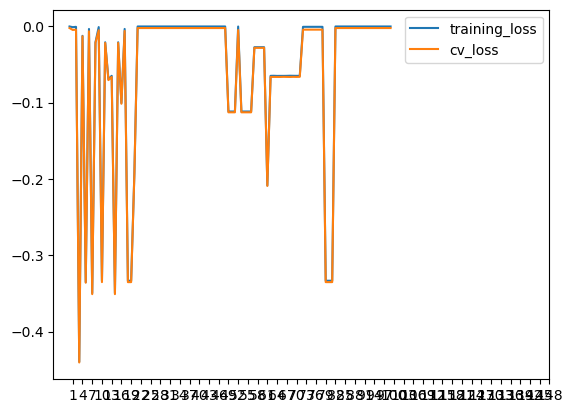

In [98]:
plt.plot(study.trials_dataframe()["number"], study.trials_dataframe()["user_attrs_training_loss"], label="training_loss")
plt.plot(study.trials_dataframe()["number"], study.trials_dataframe()["value"], label="cv_loss")
plt.xticks(range(1, 150, 3))
plt.legend()
plt.show()


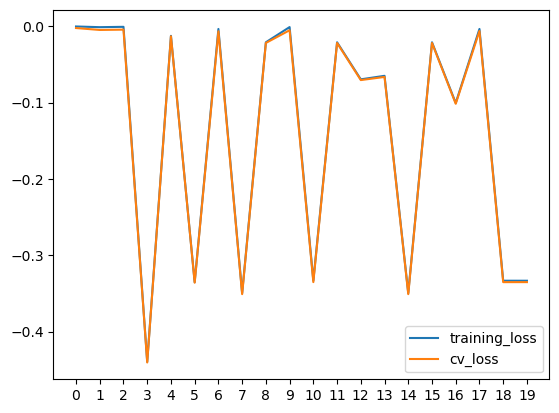

In [100]:
plt.plot(study.trials_dataframe()["number"][0:20], study.trials_dataframe()["user_attrs_training_loss"][0:20], label="training_loss")
plt.plot(study.trials_dataframe()["number"][0:20], study.trials_dataframe()["value"][0:20], label="cv_loss")
plt.xticks(range(0,20))
plt.legend()
plt.show()


In [102]:
study.best_params


{'poly_degree': 3, 'obj': ('newton-cholesky', 'l2'), 'C': 100}

In [104]:
study.trials_dataframe().iloc[2]

number                                               2
value                                        -0.004308
datetime_start              2025-03-27 11:26:28.199808
datetime_complete           2025-03-27 11:26:34.841294
duration                        0 days 00:00:06.641486
params_C                                          10.0
params_obj                       (newton-cholesky, l2)
params_poly_degree                                   3
user_attrs_training_loss                     -0.000631
state                                         COMPLETE
Name: 2, dtype: object

In [106]:
poly = PolynomialFeatures(degree=2)  # Use degree=2 as per trial 76
x_train_poly = poly.fit_transform(x_train)  # Transform training data
x_test_poly = poly.transform(x_test)
lr = LogisticRegression(penalty='l2', solver='newton-cholesky', C=10.0)
lr.fit(x_train_poly, y_train)

LogisticRegression(C=10.0, solver='newton-cholesky')

In [108]:
# Transform test data using the same PolynomialFeatures instance
x_test_poly = poly.transform(x_test)  

# Predict probabilities
yi_cap = lr.predict_proba(x_test_poly)  # Use transformed test data

# Compute log loss
log_loss(y_test, yi_cap)


0.002570383828823673

In [110]:
dm=DummyClassifier(strategy='most_frequent')
dm.fit(x_train_poly,y_train)
log_loss(y_test,dm.predict_proba(x_test_poly))

25.759197622089054

In [118]:
import pickle

In [107]:
poly = PolynomialFeatures(degree=2)  # Use degree=2 as per trial 76
x_train_poly = poly.fit_transform(x_train)  # Transform training data
x_test_poly = poly.transform(x_test)
lr = LogisticRegression(penalty='l2', solver='newton-cholesky', C=10.0)
lr.fit(x_train_poly, y_train)

LogisticRegression(C=10.0, solver='newton-cholesky')

In [110]:
final_pl = Pipeline(steps = [('transformations',ct),('estimators',lr)])

In [112]:
final_pl.fit(x_train,y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('continuos transformer',
                                                  Pipeline(steps=[('Scalinng',
                                                                   RobustScaler()),
                                                                  ('powertransformer',
                                                                   PowerTransformer())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7,
                                                   8])])),
                ('estimators',
                 LogisticRegression(C=10.0, solver='newton-cholesky'))])

In [114]:
y_pred=final_pl.predict_proba(x_test)

In [124]:
# log_loss(y_test,y_pred)


0.024073465159522564

In [120]:
pickle.dump(final_pl,open('fire_alarm.pkl','wb'))

In [ ]:
## i need to use smote analysis to balance the data 